loss = 32.927125947262915
loss = 29.57907464782238
loss = 25.58508639541824
loss = 23.834302181438034
loss = 23.197829233937817
loss = 22.88343482090811
loss = 22.697033714580222
loss = 22.573899768855362
loss = 22.486584370504517
loss = 22.42149036623468
loss = 22.371119680889255
loss = 22.331000348105054
loss = 22.29830071366601
loss = 22.271141058427972
loss = 22.248224934730608
loss = 22.228629455162707
loss = 22.211679951996924
loss = 22.196871902452813
loss = 22.18382055985303
loss = 22.17222746408992
loss = 22.16185758356388
loss = 22.152523350559488
loss = 22.144073281926826
loss = 22.136383719633976
loss = 22.129352737479888
loss = 22.122895579390967
loss = 22.116941198565865
loss = 22.111429599769963
loss = 22.106309775621472
loss = 22.101538087696635
loss = 22.0970769845886
loss = 22.09289397792855
loss = 22.088960817841023
loss = 22.08525282399437
loss = 22.08174833907686
loss = 22.078428279364708
loss = 22.07527576286241
loss = 22.072275799851383
loss = 22.069415033975293


loss = 17.855594175312582
loss = 17.84972559164648
loss = 17.8439083728785
loss = 17.8381414266707
loss = 17.832423691134945
loss = 17.82675413376383
loss = 17.821131750406227
loss = 17.81555556428533
loss = 17.81002462505729
loss = 17.804538007908477
loss = 17.79909481268958
loss = 17.793694163084908
loss = 17.788335205815205
loss = 17.783017109872496
loss = 17.777739065785504
loss = 17.77250028491421
loss = 17.7672999987723
loss = 17.762137458376237
loss = 17.757011933619733
loss = 17.751922712672542
loss = 17.746869101402485
loss = 17.741850422819667
loss = 17.736866016541953
loss = 17.731915238280727
loss = 17.726997459346133
loss = 17.722112066170858
loss = 17.71725845985177
loss = 17.712436055708547
loss = 17.70764428285869
loss = 17.702882583808083
loss = 17.698150414056606
loss = 17.693447241718037
loss = 17.688772547153754
loss = 17.68412582261956
loss = 17.679506571925213
loss = 17.67491431010601
loss = 17.67034856310606
loss = 17.665808867472638
loss = 17.661294770061325
los

loss = 16.76802758269564
loss = 16.765766343943604
loss = 16.76350978006282
loss = 16.76125788755808
loss = 16.759010662850457
loss = 16.756768102277853
loss = 16.75453020209553
loss = 16.75229695847671
loss = 16.75006836751312
loss = 16.74784442521564
loss = 16.74562512751487
loss = 16.74341047026182
loss = 16.741200449228504
loss = 16.738995060108635
loss = 16.736794298518266
loss = 16.73459815999652
loss = 16.732406640006232
loss = 16.730219733934703
loss = 16.72803743709439
loss = 16.725859744723635
loss = 16.72368665198742
loss = 16.72151815397809
loss = 16.71935424571611
loss = 16.717194922150842
loss = 16.71504017816129
loss = 16.71289000855689
loss = 16.71074440807828
loss = 16.708603371398095
loss = 16.70646689312174
loss = 16.704334967788206
loss = 16.70220758987086
loss = 16.700084753778246
loss = 16.69796645385488
loss = 16.695852684382093
loss = 16.693743439578807
loss = 16.69163871360236
loss = 16.68953850054933
loss = 16.68744279445635
loss = 16.6853515893009
loss = 16.6

loss = 16.229355628522658
loss = 16.22826057265241
loss = 16.227167773862373
loss = 16.22607722625541
loss = 16.224988923949706
loss = 16.223902861078717


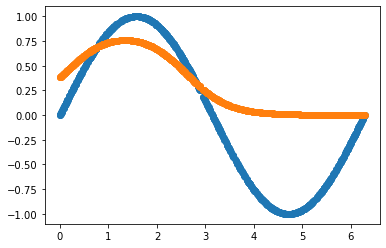

In [1]:

import numpy as np
import math 

np.random.seed(0)

class NeuralNet:

    def __init__(self, layers=[1,100,1], activations=['relu','relu']):
        assert(len(layers) == len(activations)+1)
        self.layers = layers 
        self.activations = activations

        self.weights = []
        self.biases = []

        #initialize weights
        for i in range(len(self.layers)-1):
            self.weights.append(np.random.randn(self.layers[i+1], self.layers[i]))
            self.biases.append(np.random.randn(self.layers[i+1], 1))

    @staticmethod
    def getActivationFunction(name):
        if(name == 'sigmoid'):
            return lambda x : np.exp(x)/(1+np.exp(x))
        else:
            print("Unknown. Using Linear instead")
            return lambda x: x 

    def feedforward(self, x):

        # feedforward loop starts
        input_to_layer = np.copy(x) # why use np.copy?

        output_from_layers = []
        intermediate_inputs = [input_to_layer]

        for j in range(len(self.weights)):
            activation_function = self.getActivationFunction(self.activations[j])
            output_from_layers.append(self.weights[j].dot(input_to_layer)+self.biases[j])
            input_to_layer = activation_function(output_from_layers[-1])
            intermediate_inputs.append(input_to_layer)

        return (output_from_layers, intermediate_inputs)

    @staticmethod
    def getDerivitiveActivationFunction(name):
        if(name == 'sigmoid'):
            sig = lambda x : np.exp(x)/(1+np.exp(x))
            return lambda x :sig(x)*(1-sig(x))
        else:
            print('Unknown activation. Using Linear instead')
            return lambda x: 1

    def backpropagation(self, y, output_from_layers, intermediate_inputs):
        # Notes:  elementwise multiplication is sometimes called 
        # the Hadamard product or Schur product
        dw = [] #dC/dW
        db = [] #dC/dW
        deltas = [None] * len(self.weights) #dC/dZ errors for each layer

        # insert the last layer error
        deltas[-1] = ((y-intermediate_inputs[-1])*self.getDerivitiveActivationFunction(self.activations[-1])(output_from_layers[-1]))

        # 4 equations of backpropagation and their proofs.
        for i in reversed(range(len(deltas)-1)):
            # self.getDerivitiveActivationFunction(self.activations[i] will return a function, we need to pass an x to it.
            deltas[i] = self.weights[i+1].T.dot(deltas[i+1])*(self.getDerivitiveActivationFunction(self.activations[i])(output_from_layers[i])) 

            batch_size = y.shape[1]
            db = [d.dot(np.ones((batch_size,1)))/float(batch_size) for d in deltas]

            dw = [d.dot(intermediate_inputs[i].T)/float(batch_size) for i,d in enumerate(deltas)]

        return dw, db

    def train(self, x,y,batch_size=10, epochs=10, lr=0.01):
        for e in range(epochs):
            i = 0
            while i<len(y):
                x_batch = x[i:i+batch_size]
                y_batch = y[i:i+batch_size]

                i = i+batch_size

                output_from_layers, intermediate_inputs = self.feedforward(x_batch)
                dw, db = self.backpropagation(y_batch, output_from_layers, intermediate_inputs)

                self.weights = [w+lr*dweight for w,dweight in zip(self.weights, dw)]
                self.biases = [w+lr*dbias for w,dbias in zip(self.biases, db)]

                print("loss = {}".format(np.linalg.norm(intermediate_inputs[-1]-y_batch)))

    
if __name__=='__main__':
    import matplotlib.pyplot as plt
    nn = NeuralNet([1, 100, 1],activations=['sigmoid', 'sigmoid'])
    X = 2*np.pi*np.random.rand(1000).reshape(1, -1)
    y = np.sin(X)
    
    nn.train(X, y, epochs=1000, batch_size=64, lr = .1)
    _, a_s = nn.feedforward(X)
    #print(y, X)
    plt.scatter(X.flatten(), y.flatten())
    plt.scatter(X.flatten(), a_s[-1].flatten())
    plt.show()